# Functions
* Lag Function
* Window Function - window size
    * Rolling Window
    * Expanding Window

In [1]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### The special thing about timeseries is that data points relate to one another.. they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. 
For Example we can 'difference' a timeseries

In [29]:
ts = pd.Series(np.random.randn(20)+10,pd.date_range('7/1/16',freq='D',periods=20))
ts_lagged = ts.shift() # ts.shift(-2), ts.shift(2)

In [30]:
ts.head()

2016-07-01     8.448525
2016-07-02     9.849461
2016-07-03    10.309095
2016-07-04    11.026668
2016-07-05    10.220120
Freq: D, dtype: float64

In [31]:
ts_lagged.head()

2016-07-01          NaN
2016-07-02     8.448525
2016-07-03     9.849461
2016-07-04    10.309095
2016-07-05    11.026668
Freq: D, dtype: float64

In [32]:
ts.tail()

2016-07-16     7.320844
2016-07-17     9.324324
2016-07-18     8.942501
2016-07-19    10.584509
2016-07-20     9.261525
Freq: D, dtype: float64

In [19]:
ts_lagged.tail()

2016-07-16     8.764054
2016-07-17    10.777138
2016-07-18    10.682831
2016-07-19    10.306296
2016-07-20     9.665666
Freq: D, dtype: float64

In [33]:
ts.diff()

2016-07-01         NaN
2016-07-02    1.400936
2016-07-03    0.459634
2016-07-04    0.717572
2016-07-05   -0.806547
2016-07-06   -0.004319
2016-07-07    0.120048
2016-07-08   -0.663647
2016-07-09   -0.642589
2016-07-10    1.238601
2016-07-11   -0.280988
2016-07-12   -0.912302
2016-07-13    1.746744
2016-07-14   -0.531941
2016-07-15   -1.417918
2016-07-16   -1.550966
2016-07-17    2.003480
2016-07-18   -0.381823
2016-07-19    1.642008
2016-07-20   -1.322984
Freq: D, dtype: float64

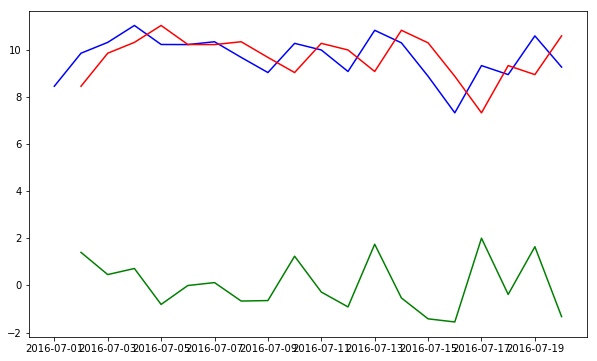

In [34]:
plt.plot(ts,color='blue')
plt.plot(ts_lagged,color='red')
plt.plot(ts-ts_lagged,color='green')

### But the need to difference is quite common, so pandas does it for you

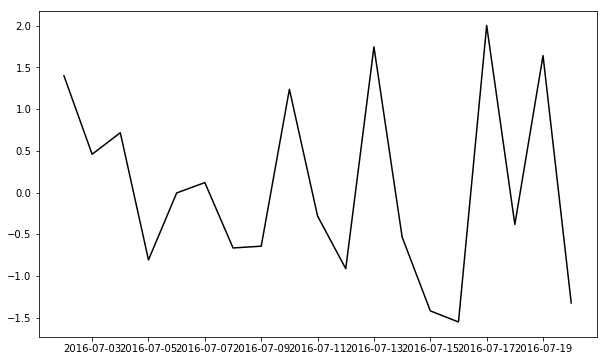

In [35]:
plt.plot(ts.diff(),color='black')

### Query: how can i shift my time series 'into the future' instead of into the past? 

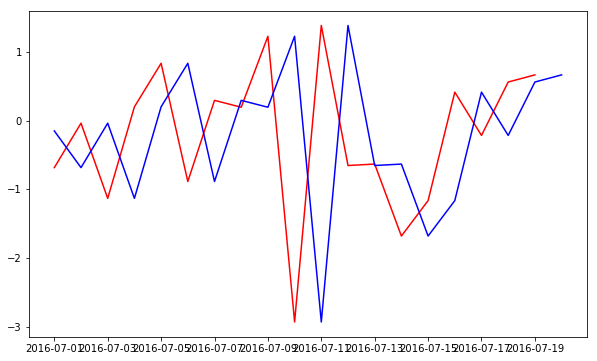

In [41]:
ts = pd.Series(np.random.randn(20),pd.date_range('7/1/16',freq='D',periods=20))
ts_lagged= ts.shift(-1)
plt.plot(ts_lagged,color='red')
plt.plot(ts,color='blue')

### Window functions give you moving aggregate measures of a time series 

In [42]:
# Window functions are likely aggregation/summary functions
# you can use them in conjuction with .resample()

In [51]:
df = pd.DataFrame(np.random.randn(600,3),index=pd.date_range('5/1/2016',freq='D',periods=600),columns=['A','B','C'])

In [52]:
df.head()

,A,B,C
2016-05-01,-0.962373,0.319551,-0.604521
2016-05-02,1.471917,-0.187709,0.112705
2016-05-03,-0.754869,0.331419,0.475784
2016-05-04,1.422151,0.575432,-0.503592
2016-05-05,0.898718,-0.992364,0.349115


In [53]:
r = df.rolling(window=20)
r

Rolling [window=20,center=False,axis=0]

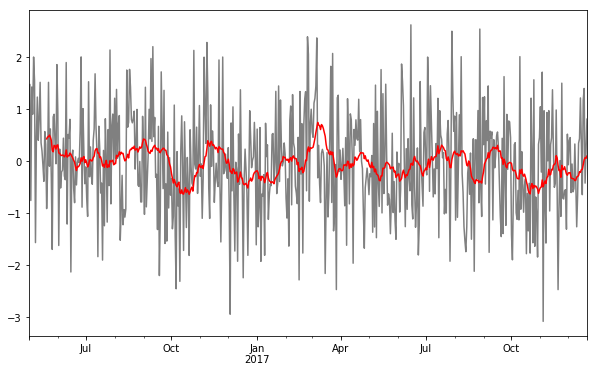

In [55]:
df['A'].plot(color='gray')
r.mean()['A'].plot(color='red')

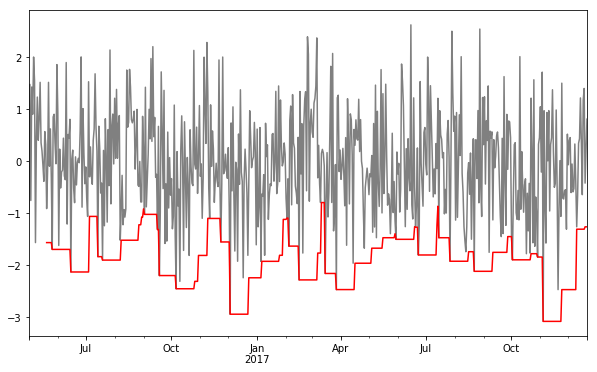

In [56]:
df['A'].plot(color='gray')
r.min()['A'].plot(color='red')

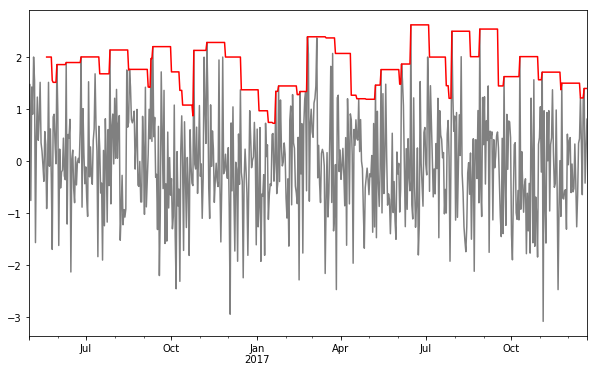

In [58]:
df['A'].plot(color='gray')
r.max()['A'].plot(color='red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, r.aggregate, r.std, r.skew, r.sum, r.var

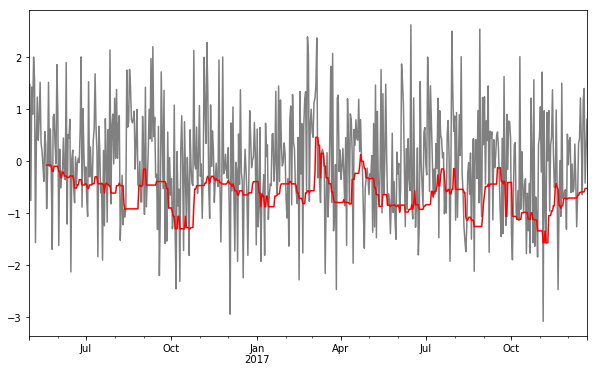

In [63]:
df['A'].plot(color='gray')
r.quantile(.3)['A'].plot(color='red')

### What about custom function?

In [75]:
df.rolling(window=10,center=False).apply(lambda x:x[1]/x[2])[10:20]

,A,B,C
2016-05-11,-0.530794,0.575949,-0.944780
2016-05-12,1.582422,-0.579859,-1.442481
2016-05-13,0.450023,4.513467,1.456783
2016-05-14,1.289393,0.256251,0.396042
2016-05-15,-0.990797,-1.289078,-0.288388
2016-05-16,-3.344398,-2.529651,-2.625351
2016-05-17,0.380382,1.953442,0.743366
2016-05-18,3.066456,-0.160797,-3.327507
2016-05-19,0.500150,1.900815,-0.369449
2016-05-20,0.530078,0.767095,-3.277940


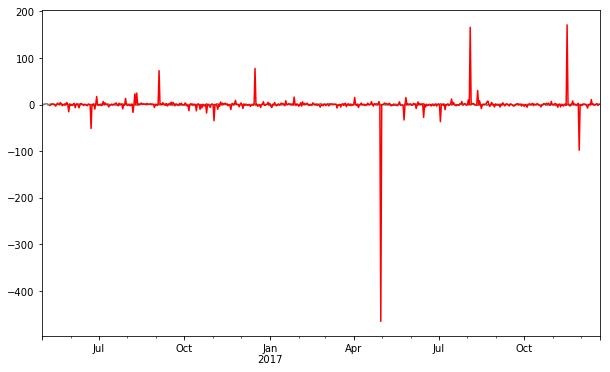

In [79]:
df['A'].plot(color='gray')
df.rolling(window=10,center=False)['A'].apply(lambda x:x[1]/x[2]).plot(color='red')

### Expanding windows

In [80]:
df.expanding(min_periods=1).mean()[1:5]

,A,B,C
2016-05-02,0.254772,0.065921,-0.245908
2016-05-03,-0.081775,0.154421,-0.005344
2016-05-04,0.294206,0.259673,-0.129906
2016-05-05,0.415109,0.009266,-0.034102


In [81]:
df.expanding(min_periods=1).median()[1:5]

,A,B,C
2016-05-02,0.254772,0.065921,-0.245908
2016-05-03,-0.754869,0.319551,0.112705
2016-05-04,0.333641,0.325485,-0.195443
2016-05-05,0.898718,0.319551,0.112705


# Try
1. How can you perform an exponetially weight moving average rather than a window function? (Hint: look for ewma +pandas doc) 
     * More recent points will have more weight
2. When would you use an expanding window vs a rolling window?
3. Write a custom function to replace quantile(.5) function for moving average?
4. How would you compute more aggregation function on a moving window function at the same time?

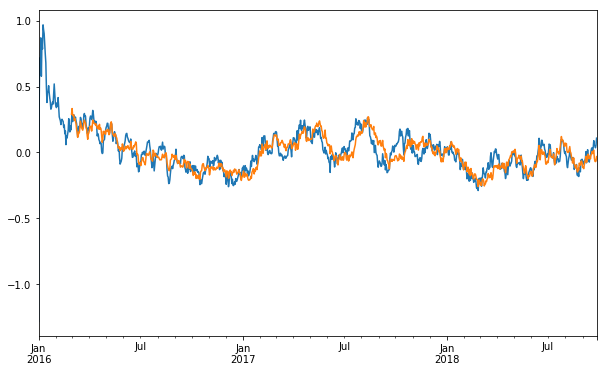

In [85]:
#1. How can you perform an exponetially weight moving average rather than a window function? 
ts = pd.Series(np.random.randn(1000),index=pd.date_range(start='1/1/16',periods=1000,freq='D'))
ts.ewm(span=60,freq='D',min_periods=0,adjust=True).mean().plot()
ts.rolling(window=60).mean().plot()

In [87]:
#3. Write a custom function to replace quantile(.5) function for moving average?
r=df.rolling(window=20)
r.apply(lambda x:sorted(x)[round(len(x)*.5)])

,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,NaN,NaN,NaN


In [88]:
#4. How would you compute more aggregation function on a moving window function at the same time?
r = df.rolling(window=20)
r.agg(['sum','mean']).head(30)

A                   B                   C          
                 sum      mean       sum      mean       sum      mean
2016-05-01       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-02       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-03       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-04       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-05       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-06       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-07       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-08       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-09       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-10       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-11       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-12       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-13       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-14       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-15       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-16       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-17       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-18       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-19       NaN       NaN       NaN       NaN       NaN       NaN
2016-05-20  8.524923  0.426246  3.279740  0.163987 -1.527427 -0.076371
2016-05-21  9.290295  0.464515  3.240363  0.162018 -1.823167 -0.091158
2016-05-22  9.329588  0.466479  2.165362  0.108268 -2.006824 -0.100341
2016-05-23  9.987287  0.499364 -0.318902 -0.015945 -2.928258 -0.146413
2016-05-24  9.183453  0.459173 -1.405673 -0.070284 -3.439527 -0.171976
2016-05-25  7.972361  0.398618  2.225256  0.111263 -4.595753 -0.229788
2016-05-26  4.281559  0.214078  1.120232  0.056012 -6.736840 -0.336842
2016-05-27  3.579444  0.178972  1.298941  0.064947 -7.060168 -0.353008
2016-05-28  6.041740  0.302087  1.736536  0.086827 -4.513771 -0.225689
2016-05-29  5.917849  0.295892  2.522948  0.126147 -4.773721 -0.238686
2016-05-30  4.638068  0.231903  0.800269  0.040013 -7.090386 -0.354519

In [ ]:
df.rolling(window=10,center=False)['A'].apply(lambda x:x[1]/x[2]).plot(color='red')